### Import necessary libaries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into notebook

In [3]:
df = pd.read_csv('customer_churn_dataset.csv')

In [4]:
# Preview of the Dataset
df.head()

,Age,Gender,Tenure_Months,Monthly_Charges,Contract_Type,Internet_Service,Support_Calls,Payment_Method,Total_Charges,Churn
0,56,Female,65,84.01,Month-to-month,DSL,1,Card,5460.65,No
1,69,Male,54,46.97,Month-to-month,Fiber,4,Bank Transfer,2536.38,Yes
2,46,Female,52,86.86,Month-to-month,NaN,2,Bank Transfer,4516.72,No
3,32,Female,3,87.12,One year,NaN,0,Cash,261.36,No
4,60,Male,41,76.07,Month-to-month,Fiber,5,Cash,3118.87,Yes


In [5]:
# Dataset Dimensions
df.shape

(1500, 10)

In [6]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Age', 'Gender', 'Tenure_Months', 'Monthly_Charges', 'Contract_Type',
       'Internet_Service', 'Support_Calls', 'Payment_Method', 'Total_Charges',
       'Churn'],
      dtype='object')>

In [7]:
# Dataset Structure and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   object 
 2   Tenure_Months     1500 non-null   int64  
 3   Monthly_Charges   1500 non-null   float64
 4   Contract_Type     1500 non-null   object 
 5   Internet_Service  1366 non-null   object 
 6   Support_Calls     1500 non-null   int64  
 7   Payment_Method    1500 non-null   object 
 8   Total_Charges     1500 non-null   float64
 9   Churn             1500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 117.3+ KB


In [8]:
# Summary Statistics of Numerical Features
df.describe()

,Age,Tenure_Months,Monthly_Charges,Support_Calls,Total_Charges
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.732000,35.904667,69.890627,2.479333,2499.317740
std,15.071771,20.299022,17.197149,1.686654,1570.378869
min,18.000000,1.000000,40.010000,0.000000,45.260000
25%,31.000000,19.000000,55.215000,1.000000,1188.220000
50%,44.000000,36.000000,70.120000,2.000000,2389.485000
75%,56.000000,53.250000,84.870000,4.000000,3554.572500
max,69.000000,71.000000,99.860000,5.000000,7075.860000


In [9]:
# Check for Duplicate Records
df.duplicated().sum()

np.int64(0)

In [10]:
# Calculate percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

Internet_Service    8.933333
Age                 0.000000
Gender              0.000000
Tenure_Months       0.000000
Monthly_Charges     0.000000
Contract_Type       0.000000
Support_Calls       0.000000
Payment_Method      0.000000
Total_Charges       0.000000
Churn               0.000000
dtype: float64

In [11]:
df['Internet_Service'] = df['Internet_Service'].fillna(df['Internet_Service'].mode()[0])

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

Age                 0.0
Gender              0.0
Tenure_Months       0.0
Monthly_Charges     0.0
Contract_Type       0.0
Internet_Service    0.0
Support_Calls       0.0
Payment_Method      0.0
Total_Charges       0.0
Churn               0.0
dtype: float64

### Exploratory Data Analysis (EDA)

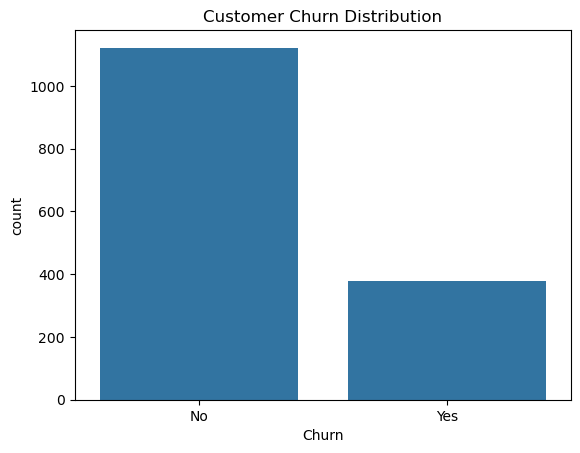

In [14]:
# Churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

In [15]:
# Calculate churn rate by gender
churn_by_gender = (df.groupby("Gender")["Churn"].apply(lambda x: (x == "Yes").mean() * 100).reset_index(name="Churn_Rate (%)"))
churn_by_gender

,Gender,Churn_Rate (%)
0,Female,26.587302
1,Male,23.790323


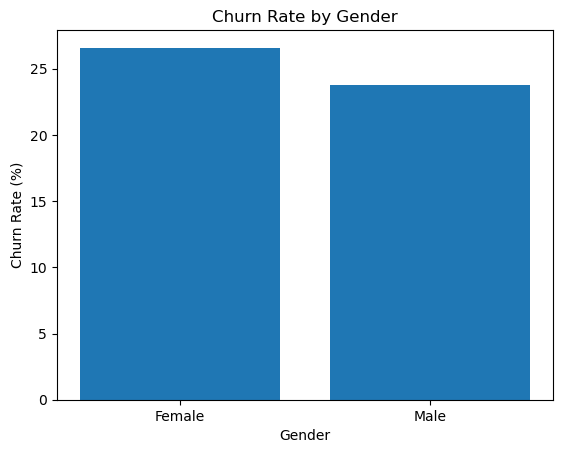

In [16]:
plt.figure()
plt.bar(churn_by_gender["Gender"], churn_by_gender["Churn_Rate (%)"])
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

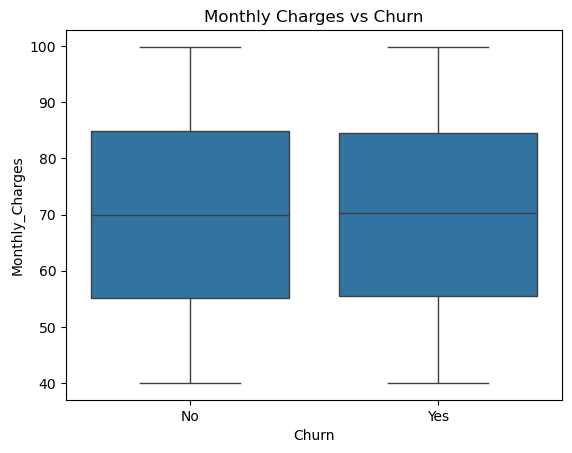

In [17]:
# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="Monthly_Charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

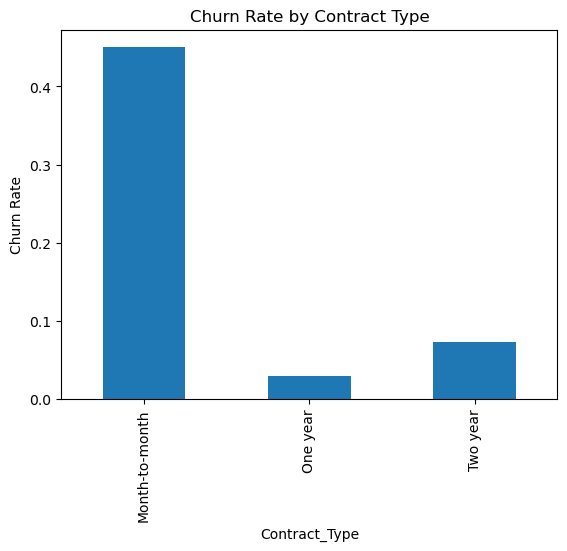

In [18]:
# Churn rate by Contract Type
contract_churn = df.groupby("Contract_Type")["Churn"].apply(lambda x: (x=="Yes").mean())
contract_churn.plot(kind="bar", title="Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

In [19]:
# Calculate churn rate by internet service
churn_by_internet = (df.groupby("Internet_Service")["Churn"].apply(lambda x: (x == "Yes").mean() * 100).reset_index(name="Churn_Rate (%)"))
churn_by_internet

,Internet_Service,Churn_Rate (%)
0,DSL,26.943005
1,Fiber,24.104235


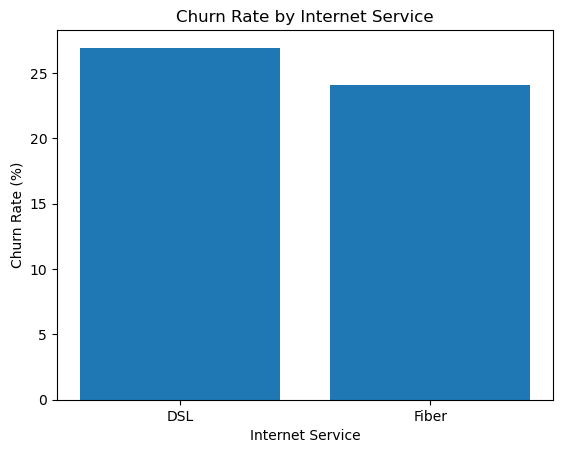

In [20]:
plt.figure()
plt.bar(churn_by_internet["Internet_Service"], churn_by_internet["Churn_Rate (%)"])
plt.title("Churn Rate by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate (%)")
plt.show()

In [21]:
# Average tenure by churn status
tenure_churn = df.groupby("Churn")["Tenure_Months"].mean().reset_index()
tenure_churn

,Churn,Tenure_Months
0,No,38.632799
1,Yes,27.806878


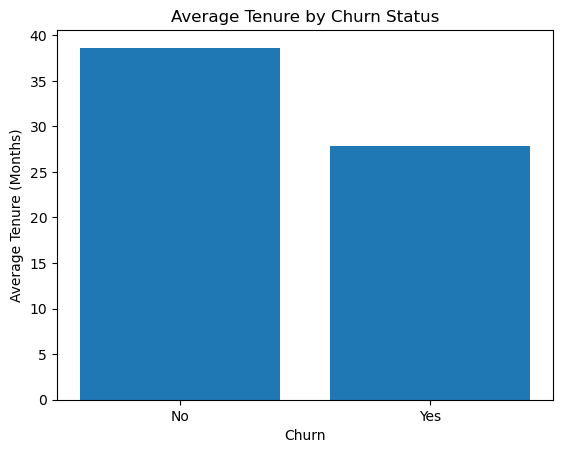

In [22]:
plt.figure()
plt.bar(tenure_churn["Churn"], tenure_churn["Tenure_Months"])
plt.title("Average Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Average Tenure (Months)")
plt.show()

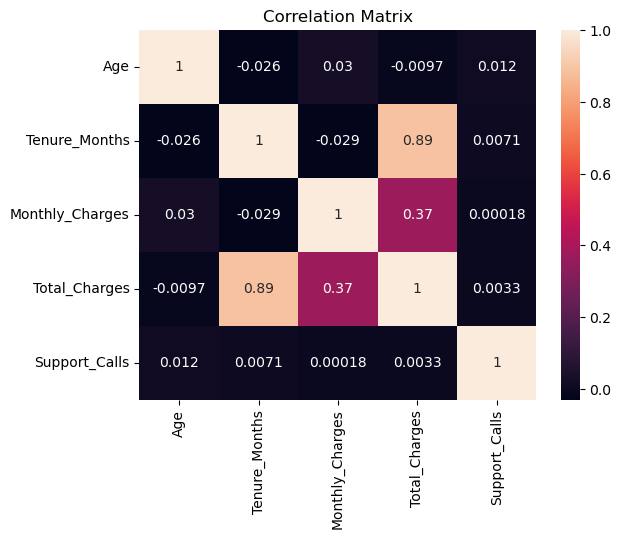

In [23]:
# Correlation heatmap for numeric features
sns.heatmap(df[["Age", "Tenure_Months", "Monthly_Charges", "Total_Charges", "Support_Calls"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

### Data Preprocessing
 * Preprocessing and ML

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import joblib

# Display options
pd.set_option("display.max_columns", None)

In [25]:
# Define features and target
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0}) 

In [26]:
# Numerical and categorical features
num_features = ["Age", "Tenure_Months", "Monthly_Charges", "Total_Charges"]
cat_features = ["Contract_Type", "Internet_Service", "Payment_Method"]

In [27]:
# Column transformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Build Machine Learning Models
 * Logistic Regression

In [29]:
log_model = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))])
log_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure_Months',
                                                   'Monthly_Charges',
                                                   'Total_Charges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Contract_Type',
                                                   'Internet_Service',
                                                   'Payment_Method'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [30]:
# Predict labels on test set
y_pred_log = log_model.predict(X_test)

# Predict probabilities on test set
y_prob_log = log_model.predict_proba(X_test)[:, 1]

In [31]:
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix - Logistic Regression:\n", cm_log)

Confusion Matrix - Logistic Regression:
 [[296  41]
 [ 62  51]]


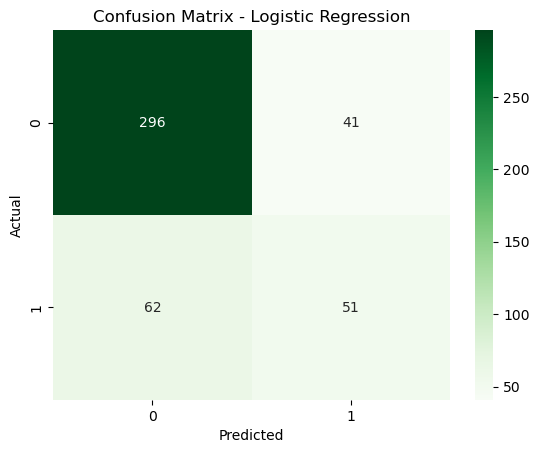

In [32]:
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [33]:
report_log = classification_report(y_test, y_pred_log, target_names=["No Churn", "Churn"])
print("Classification Report - Logistic Regression:\n")
print(report_log)

Classification Report - Logistic Regression:

              precision    recall  f1-score   support

    No Churn       0.83      0.88      0.85       337
       Churn       0.55      0.45      0.50       113

    accuracy                           0.77       450
   macro avg       0.69      0.66      0.67       450
weighted avg       0.76      0.77      0.76       450



#### Random Forest

In [34]:
model = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure_Months',
                                                   'Monthly_Charges',
                                                   'Total_Charges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Contract_Type',
                                                   'Internet_Service',
                                                   'Payment_Method'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

### Model Evaluation

In [35]:
# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[315  22]
 [ 61  52]]


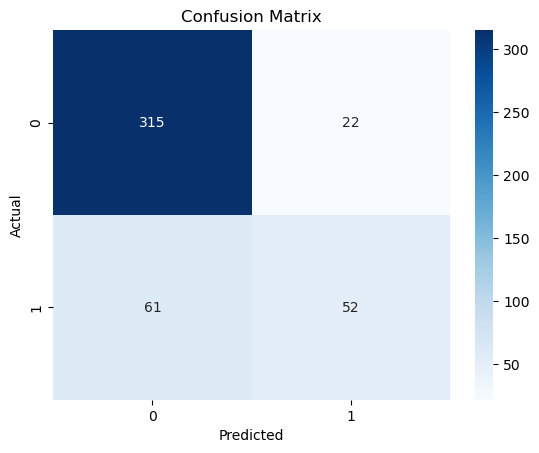

In [37]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Classification report
print("Classification Report - Random Classifier:\n", classification_report(y_test, y_pred))

Classification Report - Random Classifier:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       337
           1       0.70      0.46      0.56       113

    accuracy                           0.82       450
   macro avg       0.77      0.70      0.72       450
weighted avg       0.80      0.82      0.80       450



### Feature Importance

In [39]:
# Extract feature importances
model_steps = model.named_steps["classifier"]
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
importances = model_steps.feature_importances_

In [40]:
fi = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
fi.head(10)

,Feature,Importance
1,num__Tenure_Months,0.221088
3,num__Total_Charges,0.206529
2,num__Monthly_Charges,0.164507
4,cat__Contract_Type_One year,0.135811
0,num__Age,0.131635
5,cat__Contract_Type_Two year,0.086162
6,cat__Internet_Service_Fiber,0.019726
8,cat__Payment_Method_Cash,0.017284
7,cat__Payment_Method_Card,0.017258


### Model for Deployment

In [41]:
joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']

In [42]:
print("Model saved successfully!")

Model saved successfully!
